## Import Statements

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#import category_encoders as ce

sns.set(style = 'white')

## Loading the csv

In [3]:
#To import from the local hard drive

# Input data files are available in the "../input/" directory.
# import os
# print(os.listdir("../input"))

#To import from google colab

from google.colab import files
uploaded = files.upload()

Saving data (1).csv to data (1).csv


## Storing the csv in a dataframe

In [4]:
#Import statements to read the file
import pandas as pd
import io
  
#Storing the csv into a pandas data frame
df_telecom = pd.read_csv(io.BytesIO(uploaded['data (1).csv']))
print(df_telecom)

             Id State  ...  Customer service calls  Churn
0        CUST-1    KS  ...                       1  False
1        CUST-2    OH  ...                       1  False
2        CUST-3    NJ  ...                       0  False
3        CUST-4    OH  ...                       2  False
4        CUST-5    OK  ...                       3  False
...         ...   ...  ...                     ...    ...
3328  CUST-3329    AZ  ...                       2  False
3329  CUST-3330    WV  ...                       3  False
3330  CUST-3331    RI  ...                       2  False
3331  CUST-3332    CT  ...                       2  False
3332  CUST-3333    TN  ...                       0  False

[3333 rows x 21 columns]


# Data Overview


In [5]:
#For data understanding
df = df_telecom.copy() #Create a copy of the dataframe
df.head()

,Id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Listing down all the columns
df.columns.values

array(['Id', 'State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [7]:
#Checking the data types of all the columns
df.dtypes

Id                         object
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [8]:
#Check the descriptive statistics of numeric variables
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Treatment


In [9]:
#Removing missing values 
df.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)


df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Exploratory Data Analysis


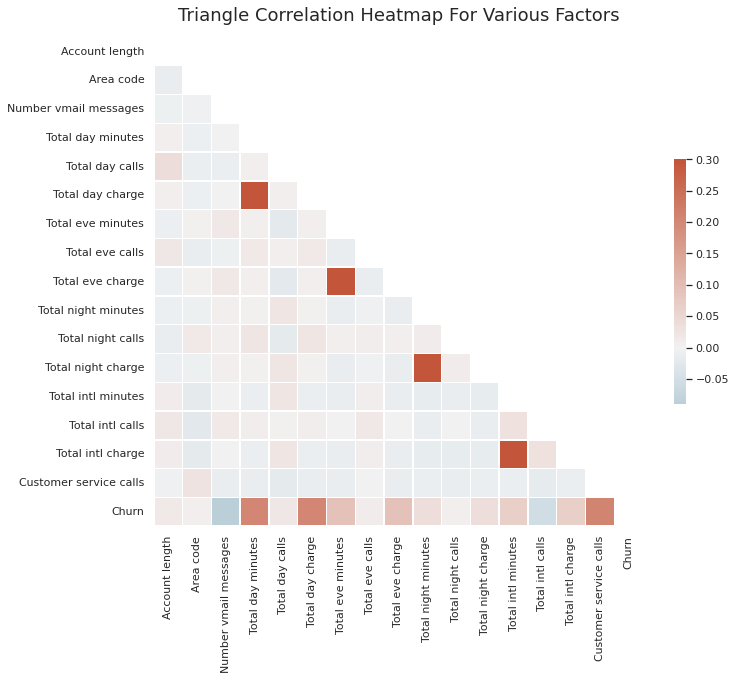

In [10]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(150, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

heatmap.set_title('Triangle Correlation Heatmap For Various Factors', fontdict={'fontsize':18}, pad=16);

### *INSIGHTS:* 

*1. Customer service calls, Total day charge, Total day minutes have high positive correlation*

*2. Number of voice mail messages and Total international calls have negative correlation*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Churn  VS Customer service calls')

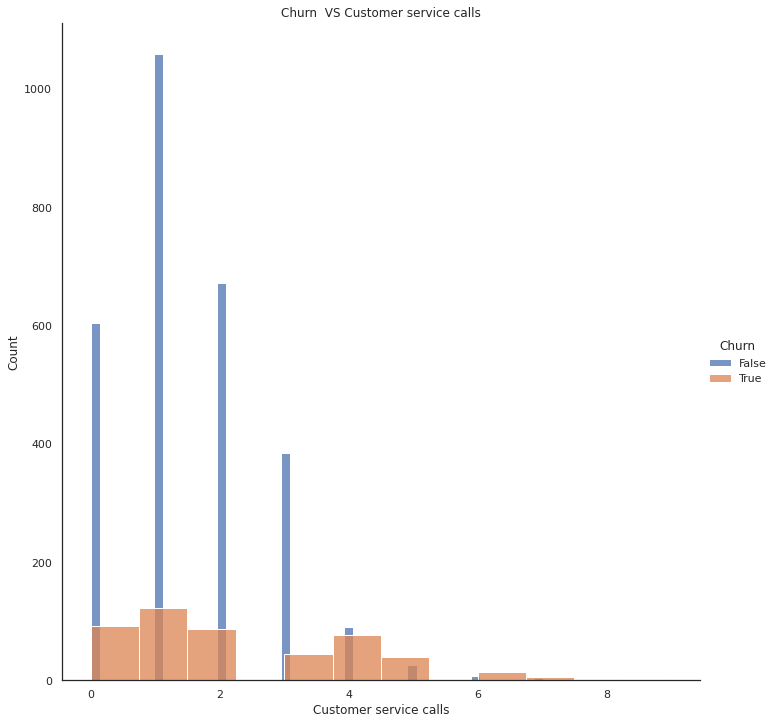

In [11]:
# Analyzing Customer service calls and Churn

sns.FacetGrid(df2, hue='Churn',size=10).map(sns.histplot, 'Customer service calls').add_legend()
plt.title('Churn  VS Customer service calls')

### *INSIGHTS: Customer churn is high when only one call has been made to the customer service*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


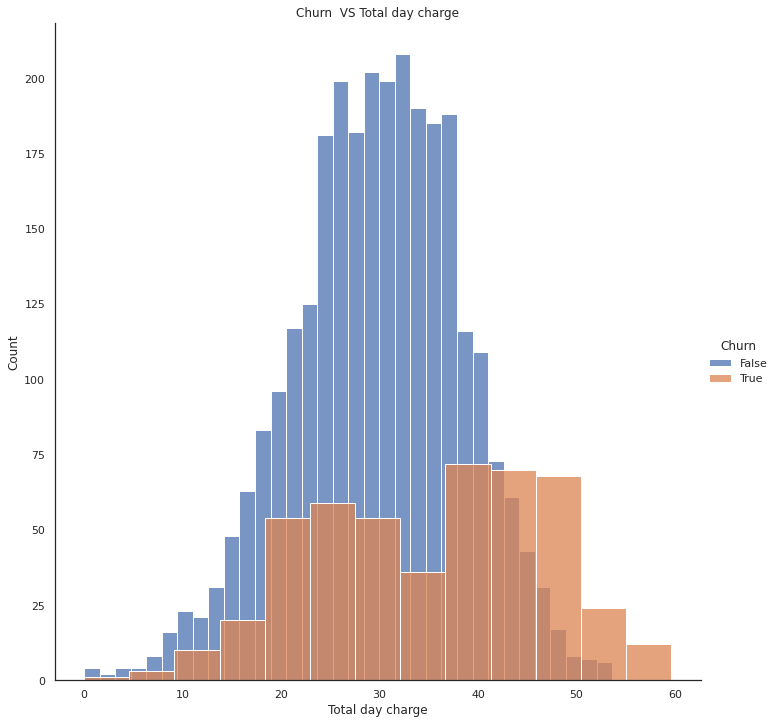

In [12]:
#Analyzing Total day charge and Churn

sns.FacetGrid(df2, hue='Churn',size=10).map(sns.histplot, 'Total day charge').add_legend()
plt.title('Churn  VS Total day charge')
plt.show()

### *INSIGHTS:  Churn is very high when the total day charge is around 40*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


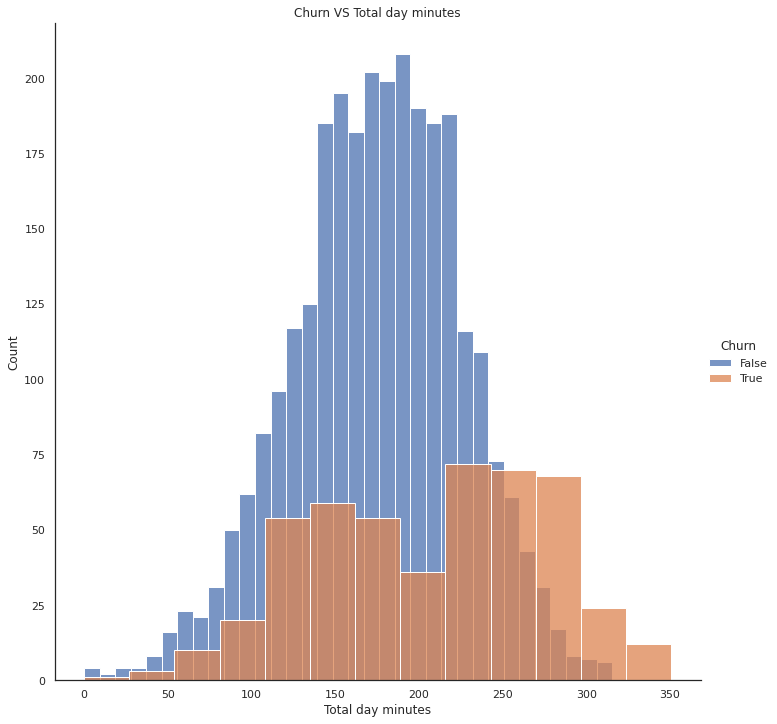

In [13]:
#Analyzing Total day minutes and Churn

sns.FacetGrid(df2, hue='Churn',size=10).map(sns.histplot, 'Total day minutes').add_legend()
plt.title('Churn VS Total day minutes')
plt.show()

### *INSIGHTS: When total daily minutes pertaining to calls is around 220 to 290 then churn is high  text*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


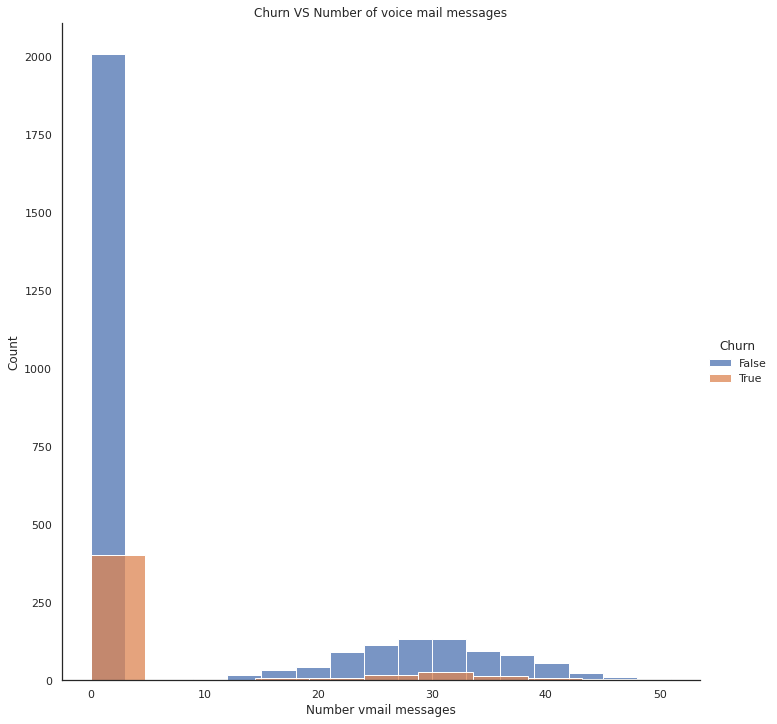

In [14]:
#Analyzing Number of voice mail messages and Churn

sns.FacetGrid(df2, hue='Churn',size=10).map(sns.histplot, 'Number vmail messages').add_legend()
plt.title('Churn VS Number of voice mail messages')
plt.show()

### *INSIGHTS: When the number of voice mail message is one then it leads to high customer churn*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


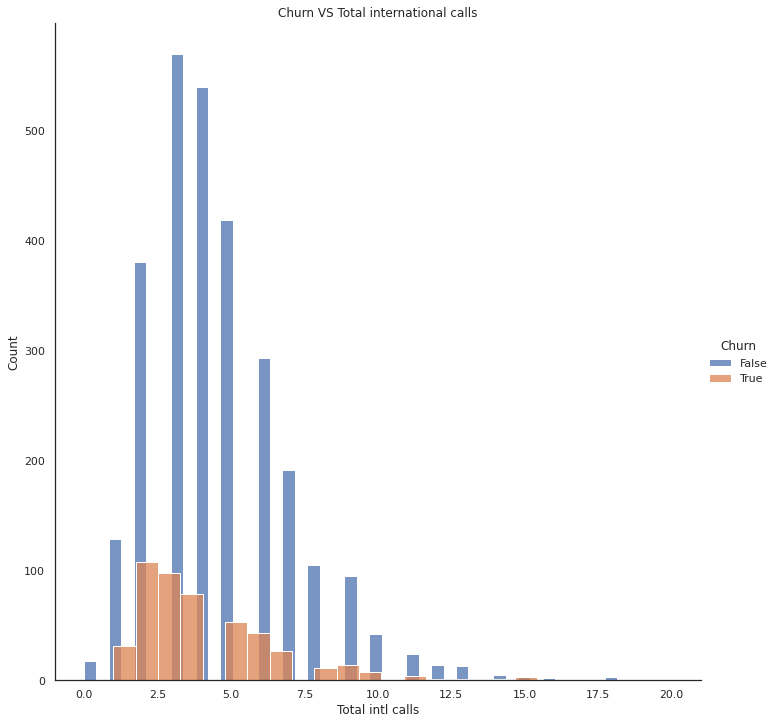

In [15]:
#Analyzing Total international calls and Churn

sns.FacetGrid(df2, hue='Churn',size=10).map(sns.histplot, 'Total intl calls').add_legend()
plt.title('Churn VS Total international calls')
plt.show()

### *INSIGHTS: When the total internation calls are between 2 to 4 minutes then the churn of customers is high*

# Modelling and comparison between various models

In [16]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [17]:
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

In [18]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [26]:
#pip install imblearn
from imblearn.combine import SMOTEENN


In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

##Logistic Regression

In [39]:
# Create Train & Test Data

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=101)

In [122]:
LR_model1 = LogisticRegression()


# fit model
LR_model1.fit(X_train_lr, y_train_lr)


# predict probabilities
lr_pred_prob1 = LR_model1.predict_proba(X_test_lr)


from sklearn.metrics import roc_curve

# roc curve for models
lr_fpr1, lr_tpr1, lr_thresh1 = roc_curve(y_test_lr, lr_pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs_lr = [0 for i in range(len(y_test_lr))]
p_fpr_lr, p_tpr_lr, _ = roc_curve(y_test_lr, random_probs_lr, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
lr_auc_score1 = roc_auc_score(y_test_lr, lr_pred_prob1[:,1])


print(lr_auc_score1)

0.8470143995621985


In [123]:
#Print the prediction accuracy

prediction_test_lr = LR_model1.predict(X_test_lr) 
print (metrics.accuracy_score(y_test_lr, prediction_test_lr))

0.7847953216374269


In [124]:
#Print Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_lr, prediction_test_lr)
print(confusion_matrix)

[[681 184]
 [184 661]]


In [125]:
#Print Classification report

print(classification_report(y_test_lr, prediction_test_lr))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79       865
        True       0.78      0.78      0.78       845

    accuracy                           0.78      1710
   macro avg       0.78      0.78      0.78      1710
weighted avg       0.78      0.78      0.78      1710



## Random Forest

In [60]:
#Dividing into train and test for Random Forest 

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=101)

In [118]:
RF_model2 = RandomForestClassifier()

# fit model
RF_model2.fit(X_train_rf, y_train_rf)

# predict probabilities
rf_pred_prob2 = RF_model2.predict_proba(X_test_rf)

# roc curve for models
rf_fpr2, rf_tpr2, rf_thresh2 = roc_curve(y_test_rf, rf_pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs_rf = [0 for i in range(len(y_test_rf))]
p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test_rf, random_probs_rf, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
rf_auc_score2 = roc_auc_score(y_test_rf, rf_pred_prob2[:,1])

print(rf_auc_score2)

0.9893358984224702


In [119]:
#Print the accuracy for Random Forest

prediction_test_rf = RF_model2.predict(X_test_rf)
print (metrics.accuracy_score(y_test_rf, prediction_test_rf))

0.9456140350877194


In [120]:
#Print confusion matrix for Random Forest
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_rf, prediction_test_rf)

array([[544,  21],
       [ 41, 534]])

In [121]:
#Print classification report for Random Forest

print(classification_report(y_test_rf, prediction_test_rf))

              precision    recall  f1-score   support

       False       0.93      0.96      0.95       565
        True       0.96      0.93      0.95       575

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



## Support Vector Machine

In [93]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.2, random_state=99)

In [96]:

SVC_model4 = SVC(probability=True)
'''SVM's default output is binary (-1, 1) which is given by the design of the algorithm itself 
(finding the best separating hyperplane and either the target is on one side or the other).
SVM to output probabilities, specify probability=True when you are instantiating the SVC class'''


# fit model
SVC_model4.fit(X_train_svc, y_train_svc)


# predict probabilities
svc_pred_prob4 = SVC_model4.predict_proba(X_test_svc)


from sklearn.metrics import roc_curve

# roc curve for models
svc_fpr4, svc_tpr4, svc_thresh4 = roc_curve(y_test_svc, svc_pred_prob4[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs_svc = [0 for i in range(len(y_test_svc))]
p_fpr_svc, p_tpr_svc, _ = roc_curve(y_test_svc, random_probs_svc, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
svc_auc_score4 = roc_auc_score(y_test_svc, svc_pred_prob4[:,1])


print(svc_auc_score4)

0.929497086414269


In [97]:
#Print the prediction accuracy

prediction_test_svc = SVC_model4.predict(X_test_svc) 
print (metrics.accuracy_score(y_test_svc, prediction_test_svc))

0.8570175438596491


In [98]:
#Print Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_svc, prediction_test_svc)
print(confusion_matrix)

[[456  87]
 [ 76 521]]


In [99]:
#Print Classification report

print(classification_report(y_test_svc, prediction_test_svc))

              precision    recall  f1-score   support

       False       0.86      0.84      0.85       543
        True       0.86      0.87      0.86       597

    accuracy                           0.86      1140
   macro avg       0.86      0.86      0.86      1140
weighted avg       0.86      0.86      0.86      1140



## Ada Boost

In [85]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y, test_size=0.2, random_state=99)

In [87]:
AB_model3 = AdaBoostClassifier()


# fit model
AB_model3.fit(X_train_ab, y_train_ab)


# predict probabilities
ab_pred_prob3 = AB_model3.predict_proba(X_test_ab)


from sklearn.metrics import roc_curve

# roc curve for models
ab_fpr3, ab_tpr3, ab_thresh3 = roc_curve(y_test_ab, ab_pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs_ab = [0 for i in range(len(y_test_ab))]
p_fpr_ab, p_tpr_ab, _ = roc_curve(y_test_ab, random_probs_ab, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
ab_auc_score3 = roc_auc_score(y_test_ab, ab_pred_prob3[:,1])


print(ab_auc_score3)

0.9476572549672857


In [88]:
#Print the prediction accuracy

prediction_test_ab = AB_model3.predict(X_test_ab) 
print (metrics.accuracy_score(y_test_ab, prediction_test_ab))

0.8973684210526316


In [89]:
#Print Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_ab, prediction_test_ab)
print(confusion_matrix)

[[505  38]
 [ 79 518]]


In [90]:
#Print Classification report

print(classification_report(y_test_ab, prediction_test_ab))

              precision    recall  f1-score   support

       False       0.86      0.93      0.90       543
        True       0.93      0.87      0.90       597

    accuracy                           0.90      1140
   macro avg       0.90      0.90      0.90      1140
weighted avg       0.90      0.90      0.90      1140



## XG Boost

In [111]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size=0.2, random_state=99)

In [112]:
XG_model5 = XGBClassifier()


# fit model
XG_model5.fit(X_train_xg, y_train_xg)


# predict probabilities
xg_pred_prob5 = XG_model5.predict_proba(X_test_xg)


from sklearn.metrics import roc_curve

# roc curve for models
xg_fpr5, xg_tpr5, xg_thresh5 = roc_curve(y_test_xg, xg_pred_prob5[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs_xg = [0 for i in range(len(y_test_xg))]
p_fpr_xg, p_tpr_xg, _ = roc_curve(y_test_xg, random_probs_xg, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
xg_auc_score5 = roc_auc_score(y_test_xg, xg_pred_prob5[:,1])


print(xg_auc_score5)

0.9772851365483033


In [113]:
#Print the prediction accuracy

prediction_test_xg = XG_model5.predict(X_test_xg) 
print (metrics.accuracy_score(y_test_xg, prediction_test_xg))

0.9464912280701754


In [114]:
#Print Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_xg, prediction_test_xg)
print(confusion_matrix)

[[517  26]
 [ 35 562]]


In [115]:
#Print Classification report

print(classification_report(y_test_xg, prediction_test_xg))

              precision    recall  f1-score   support

       False       0.94      0.95      0.94       543
        True       0.96      0.94      0.95       597

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



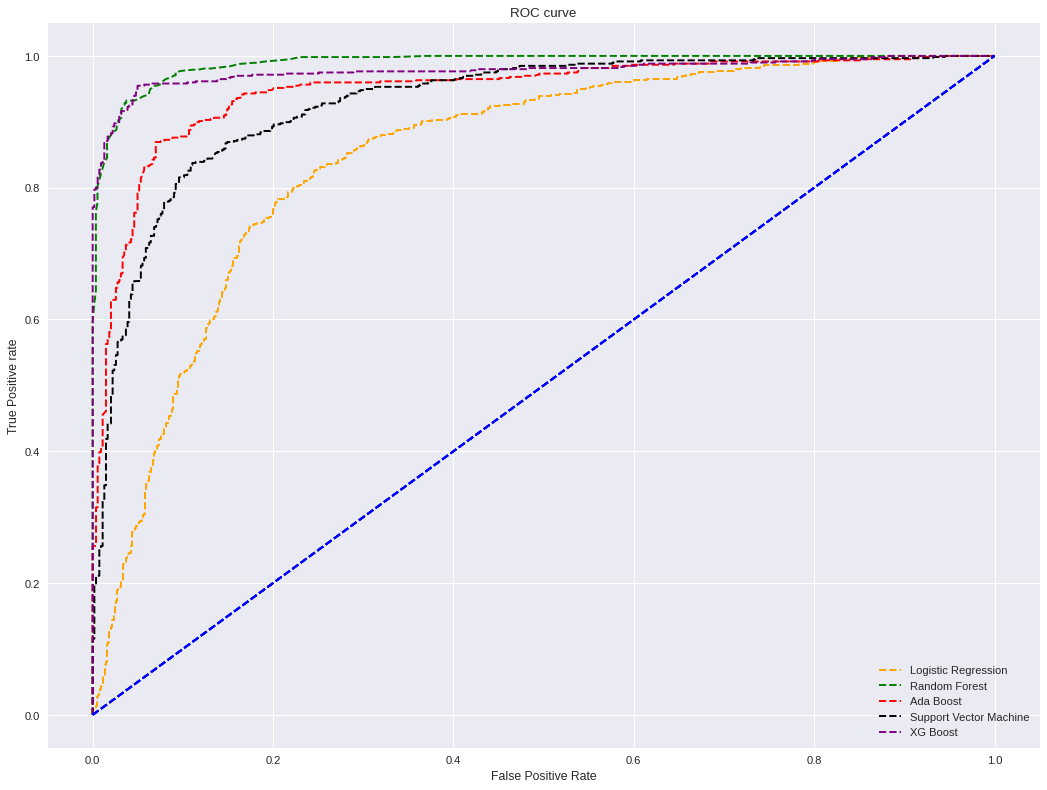

In [133]:
# matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.style.use('seaborn')
figure(figsize=(16, 12), dpi=80)

# plot roc curves
plt.plot(lr_fpr1, lr_tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(rf_fpr2, rf_tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(ab_fpr3, ab_tpr3, linestyle='--',color='red', label='Ada Boost')
plt.plot(svc_fpr4, svc_tpr4, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(xg_fpr5, xg_tpr5, linestyle='--',color='purple', label='XG Boost')
plt.plot(p_fpr_lr, p_tpr_lr, linestyle='--', color='blue')
plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')
plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')
plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')
plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
##plt.savefig('ROC',dpi=300)
plt.savefig('ROC')
plt.show();

### Parameter Turning for XG Boost

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
#eta, min_child_weight, max_depth, max_leaf_nodes, gamma, max_delta_step 
param_grid = [
    {'eta': [0.1, 0.3, 0.5, 0.7, 0.9], 'min_child_weight': [5, 15, 20, 100], 'max_depth' : [3, 10, 25, 50], 'gamma' : [1,5,10]},
    {'n_estimators': [100, 200, 500], 'criterion': ['gini', 'entropy'], 'min_samples_split': [1,2,4,5],'min_samples_leaf': [1,2,4,5],'max_leaf_nodes': [4,10,20,50,None]}
]

#forest_reg = model_xg(random_state=42)
grid_search = GridSearchCV(model_xg, param_grid, cv=5,scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train, y_train)

# train across 5 folds, that's a total of (12+6)*5

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid=[{'eta': [0.1, 0.3, 0.5, 0.7, 0.9], 'gamma': [1, 5, 10],
                          'max_depth': [3, 10, 25, 50],
                          'min_child_weight': [5, 15, 20, 100]},
                         {'criterion': ['gini', 'entropy'],
                          'max_leaf_nodes': [4, 10, 20, 50, None],
                          'min_samples_leaf': [1, 2, 4, 5],
                          'min_samples_split': [1, 2, 4, 5],
                          'n_estimators': [100, 200, 500]}],
             return_train_score=True, scoring='roc_auc')

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'eta': [0.1, 0.3, 0.5, 0.7, 0.9], 'min_child_weight': [5, 15, 20, 100], 'max_depth' : [3, 10, 25, 50], 'gamma' : [1,5,10]},
    {'n_estimators': [100, 200, 500], 'criterion': ['gini', 'entropy'], 'min_samples_split': [1,2,4,5],'min_samples_leaf': [1,2,4,5],'max_leaf_nodes': [4,10,20,50,None]}
]

grid_search = GridSearchCV(XG_model5, param_grid, cv=5,scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train_xg, y_train_xg)


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid=[{'eta': [0.1, 0.3, 0.5, 0.7, 0.9], 'gamma': [1, 5, 10],
                          'max_depth': [3, 10, 25, 50],
                          'min_child_weight': [5, 15, 20, 100]},
                         {'criterion': ['gini', 'entropy'],
                          'max_leaf_nodes': [4, 10, 20, 50, None],
                          'min_samples_leaf': [1, 2, 4, 5],
                          'min_samples_split': [1, 2, 4, 5],
                          'n_estimators': [100, 200, 500]}],
             return_train_score=True, scoring='roc_auc')

In [135]:
import pickle


pickle.dump(grid_search, open('XG_model5_tuned.pkl','wb'))

In [137]:
grid_search.best_estimator_ 

XGBClassifier(eta=0.1, gamma=1, max_depth=10, min_child_weight=5)

In [139]:
#Print Classification report

tuned_prediction_test_xg = grid_search.predict(X_test_xg)

print(classification_report(y_test_xg, tuned_prediction_test_xg))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97       543
        True       0.98      0.96      0.97       597

    accuracy                           0.97      1140
   macro avg       0.97      0.97      0.97      1140
weighted avg       0.97      0.97      0.97      1140



In [140]:
#Print Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_xg, tuned_prediction_test_xg)
print(confusion_matrix)

[[534   9]
 [ 26 571]]


## Ensemble model

In [141]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

vc = VotingClassifier([('clf1', RF_model2), ('clf2', XG_model5)], voting = 'soft')
cross_val_score(vc, X, y).mean()


0.9478947368421051

## CONCLUSION: As XG Boost is showing the best performance, it can be used.